In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/hajar/examples/dcdata/dogs-vs-cats-small/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [4]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 23ms/step - loss: 0.6067 - acc: 0.6660 - val_loss: 0.4471 - val_acc: 0.8150
Epoch 2/30
100/100 [==============================] - 2s 22ms/step - loss: 0.4414 - acc: 0.7990 - val_loss: 0.3641 - val_acc: 0.8590
Epoch 3/30
100/100 [==============================] - 2s 22ms/step - loss: 0.3518 - acc: 0.8575 - val_loss: 0.3317 - val_acc: 0.8580
Epoch 4/30
100/100 [==============================] - 2s 22ms/step - loss: 0.3199 - acc: 0.8640 - val_loss: 0.3025 - val_acc: 0.8850
Epoch 5/30
100/100 [==============================] - 2s 22ms/step - loss: 0.2840 - acc: 0.8890 - val_loss: 0.2881 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 2s 22ms/step - loss: 0.2590 - acc: 0.8975 - val_loss: 0.2735 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 2s 22ms/step - loss: 0.2481 - acc: 0.9085 - val_loss: 0.2648 - val_acc: 0.8990
Epoch 8/30
100/100 [==============================] - 3s 30ms/step - 

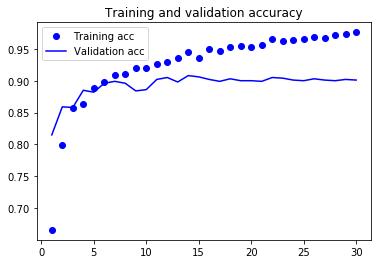

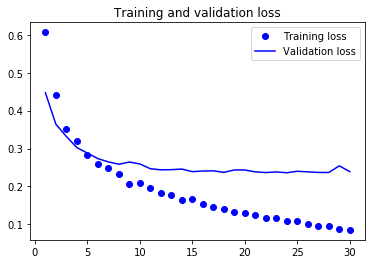

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_features, test_labels, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 0s 3ms/step - loss: 0.2566 - acc: 0.8870
test acc: 0.8870000243186951
